In [1]:
import pandas as pd
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\JuanLombana\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Carga de Datos y Acumulación por Día

In [2]:
folders = ('03','06','09')
assets = pd.read_csv('southcentral-asset.csv',sep=';')
datosNTO={}

for i,r in assets.iterrows():
    #print(r.Name)
    ultimoMin = 600
    for j in np.arange(0,len(folders)):
        with open(folders[j]+'/'+r.File, 'r') as f:
            datastore = json.load(f)
            #print('File readed:'+folders[j]+'/'+r.File)
        #tempCPU = pd.DataFrame(datastore["value"][0]["metricValues"])
        #tempNTI = pd.DataFrame(datastore["value"][1]["metricValues"])
        tempNTO = pd.DataFrame(datastore["value"][2]["metricValues"])
        tempMin = np.arange(ultimoMin,ultimoMin+(tempNTO.shape[0]*5),step=5)
        #tempCPU['minute'] = tempMin
        #tempNTI['minute'] = tempMin
        tempNTO['minute'] = tempMin
        ultimoMin = tempMin[len(tempMin)-1]+5
        #print(ultimoMin)
        #tempCPU = tempCPU.dropna(axis=0,how='any')
        #tempNTI = tempNTI.dropna(axis=0,how='any')
        tempNTO = tempNTO.dropna(axis=0,how='any')
        if r.Name in datosNTO:
            #datosCPU[r.Name] = datosCPU[r.Name].append(tempCPU)
            #datosNTI[r.Name] = datosNTI[r.Name].append(tempNTI)
            datosNTO[r.Name] = datosNTO[r.Name].append(tempNTO)
        else:
            #datosCPU[r.Name] = tempCPU
            #datosNTI[r.Name] = tempNTI
            datosNTO[r.Name] = tempNTO

IndexError: index -1 is out of bounds for axis 0 with size 0

In [7]:
accumNTO={}
for i,r in assets.iterrows():
    for d in np.arange(1,11):
        temp = datosNTO[r.Name][(datosNTO[r.Name]['minute'] >= ((d-1)*1440)) & (datosNTO[r.Name]['minute'] < (d*1440))]
        sumx = temp.apply(np.sum,axis= 0)
        accumNTO[str(d)+'-'+r.Name] = pd.DataFrame(sumx[1:5])

KeyError: 'WebFlowersPA'

In [58]:
def obtenerDatosAcumulados(nombreEmpresa):
    total = np.array([[1,accumNTO['1-'+nombreEmpresa].transpose()['total'][0]]])
    total = np.append(total, [[2,accumNTO['2-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[3,accumNTO['3-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[4,accumNTO['4-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[5,accumNTO['5-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[6,accumNTO['6-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[7,accumNTO['7-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[8,accumNTO['8-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[9,accumNTO['9-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[10,accumNTO['10-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    acumm = pd.DataFrame(total,columns=['dia','acumulado'])
    acumm = acumm.dropna(axis=0,how='any')
    return acumm

In [59]:
acumulados = {}
totalizadoDia=pd.DataFrame(columns=[0,1,2,3,4,5,6,7,8,9])
for i,r in assets.iterrows():
    company = assets.Name[i]
    Acumm = obtenerDatosAcumulados(company)
    acumulados[company]=Acumm
    t = Acumm.transpose()[1:]
    t.index = [company]
    totalizadoDia = totalizadoDia.append(t)

# Pruebas de Normalidad

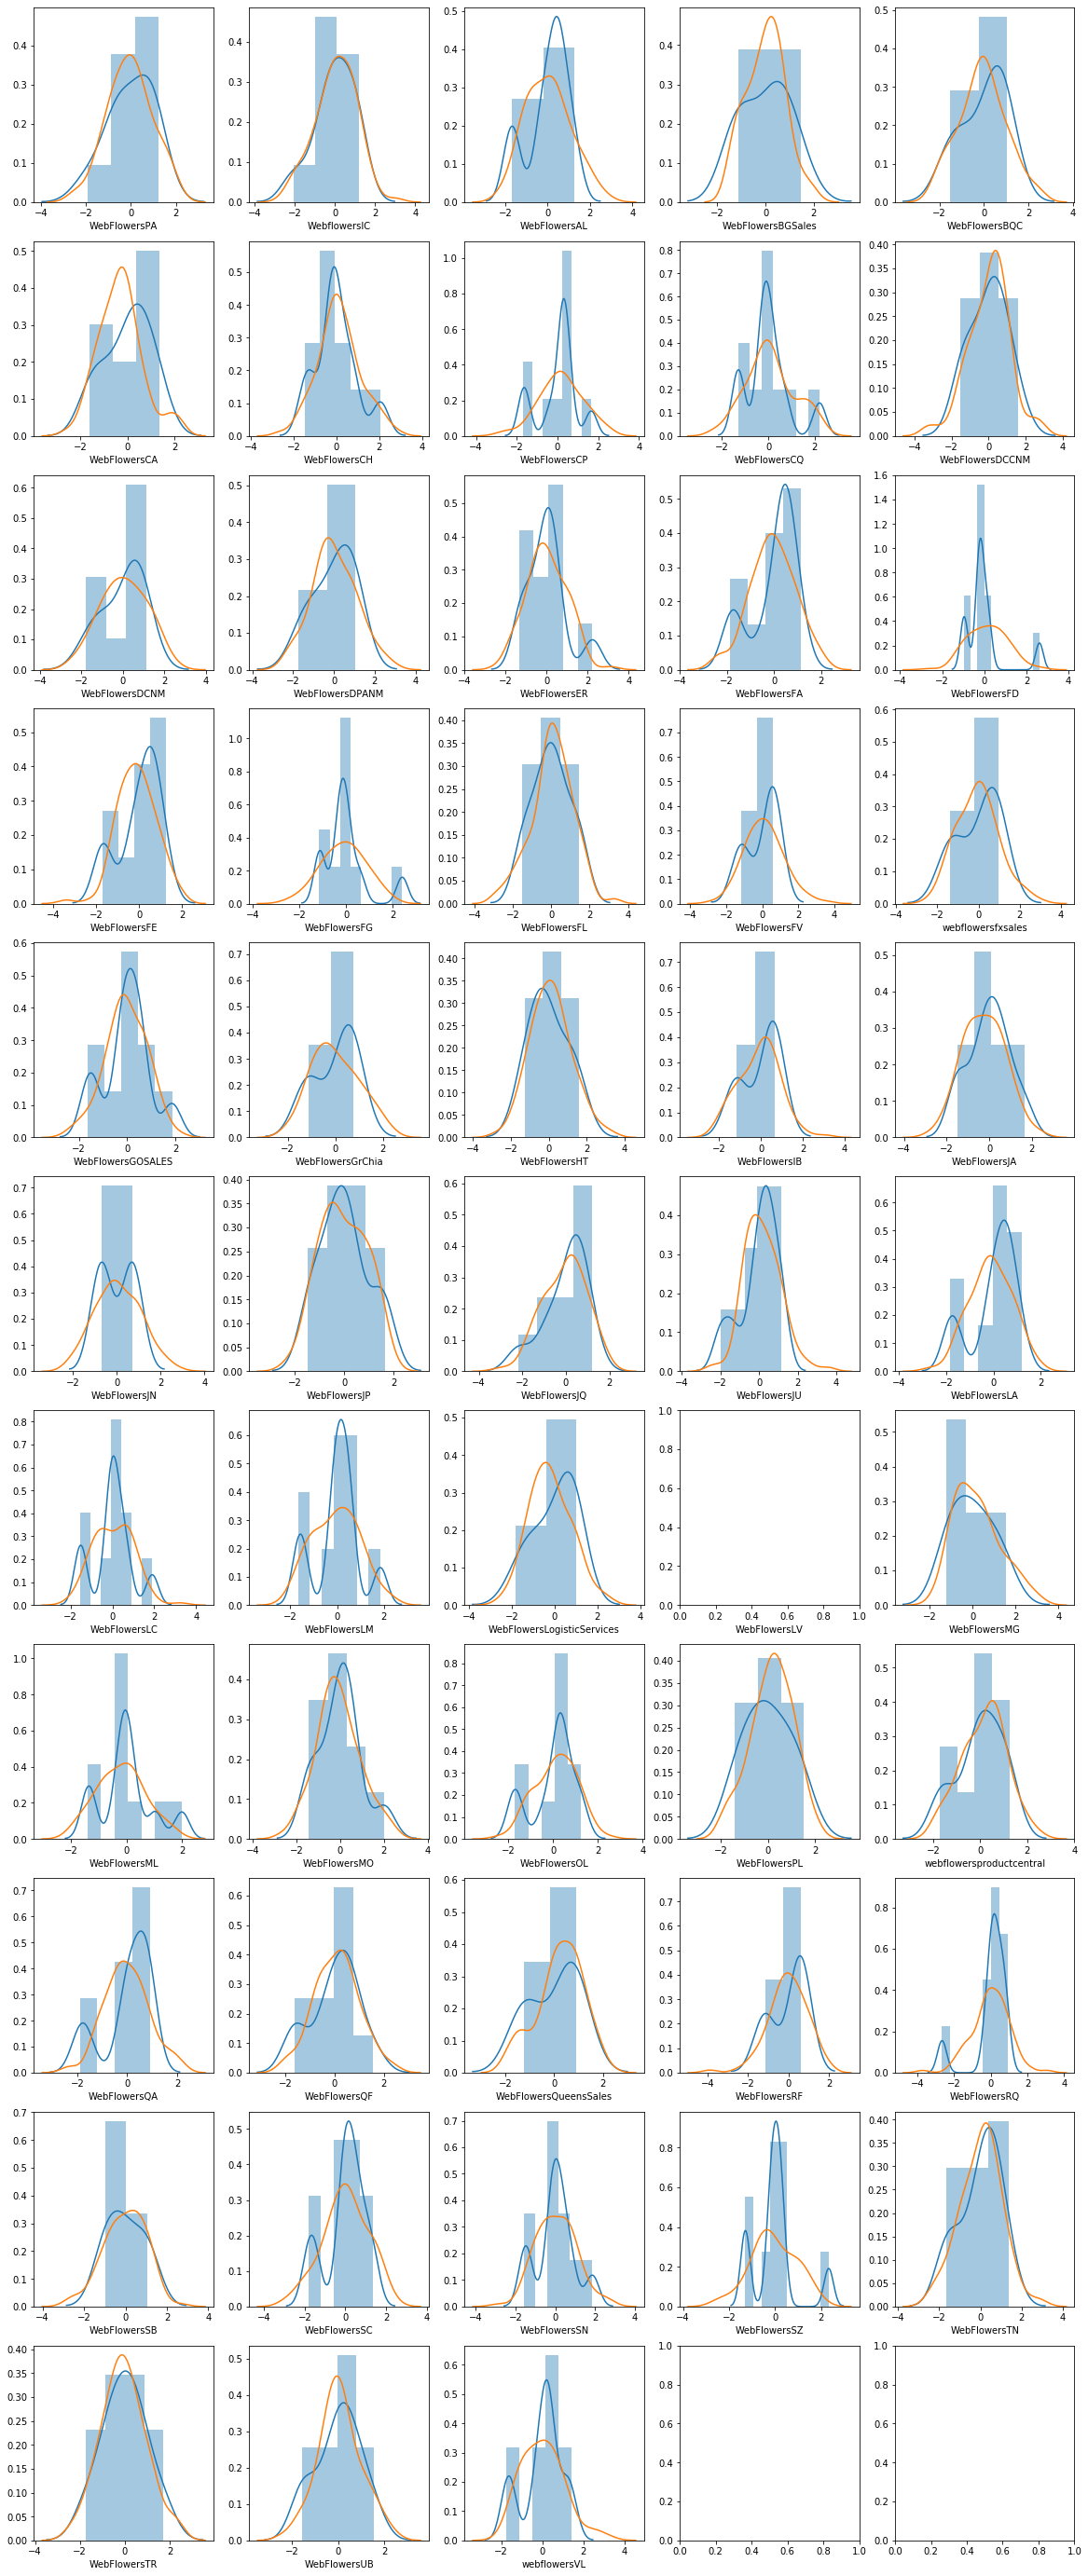

In [60]:
fig, axs = plt.subplots(11,5,figsize=(20,50))
for r in np.arange(0,11):
    for c in np.arange(0,5):
        if(r*5+c < 53):
            company = assets.Name[r*5+c]
            axs[r][c].set_xlabel(company)
            if(len(acumulados[company]['acumulado'])>1):
                m = acumulados[company].describe()['acumulado']['mean']
                s = acumulados[company].describe()['acumulado']['std']
                data=acumulados[company].apply(lambda x: (x.acumulado-m)/s,axis=1)
                normal = np.random.normal(size=100)
                sns.distplot(data,ax=axs[r][c],axlabel=False)
                sns.distplot(normal, hist=False,ax=axs[r][c])

## Rellenar Datos Faltantes

Empresas que tienen más de un día sin datos.

In [61]:
totalesNA = totalizadoDia.isna().any(axis=1)
totalizadoDia[totalesNA]

,0,1,2,3,4,5,6,7,8,9
WebFlowersBGSales,NaN,NaN,20909319.0,2.137400e+08,2.325906e+07,22907401.0,1.912741e+08,3.693581e+08,2.610325e+08,2.842227e+08
WebFlowersBQC,NaN,NaN,103286074.0,2.636803e+09,1.339758e+09,399026485.0,2.800001e+09,2.860343e+09,3.160334e+09,3.460973e+09
WebFlowersFV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.977892e+07,7.965272e+08,7.761767e+08
webflowersfxsales,NaN,11788570.0,370121501.0,5.088288e+08,6.140845e+07,21169963.0,5.213416e+08,5.809472e+08,6.056806e+08,5.579724e+08
WebFlowersGrChia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.210271e+07,4.566431e+08,3.771614e+08
WebFlowersIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.099418e+07,2.865381e+09,2.639696e+09
WebFlowersJN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.645077e+07,1.519981e+08
WebFlowersLV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.147409e+06
WebFlowersMG,NaN,NaN,28718422.0,2.513696e+08,1.245766e+08,16105798.0,3.175248e+08,1.970262e+08,1.185842e+08,3.901396e+08
WebFlowersQueensSales,NaN,NaN,84397527.0,2.125127e+09,2.407841e+08,57850249.0,2.299772e+09,2.249521e+09,1.654832e+09,2.123290e+09


Calcular el promedio de cada fila con el objetivo de rellenar los valores NaN, que tengan 2 o menos valores NaN

In [71]:
promedios = totalizadoDia[totalesNA].fillna(value=0).apply(np.average,axis=1)
totalizadoDia[totalesNA]=totalizadoDia[totalesNA].transpose().fillna(value=pd.Series(promedios),axis=0,limit=2).transpose()
totalizadoDia[totalesNA]

,0,1,2,3,4,5,6,7,8,9
WebFlowersBGSales,1.386703e+08,1.386703e+08,2.090932e+07,2.137400e+08,2.325906e+07,22907401.0,1.912741e+08,3.693581e+08,2.610325e+08,2.842227e+08
WebFlowersBQC,1.676052e+09,1.676052e+09,1.032861e+08,2.636803e+09,1.339758e+09,399026485.0,2.800001e+09,2.860343e+09,3.160334e+09,3.460973e+09
WebFlowersFV,1.622483e+08,1.622483e+08,1.946979e+08,1.946979e+08,NaN,NaN,NaN,4.977892e+07,7.965272e+08,7.761767e+08
webflowersfxsales,3.239259e+08,1.178857e+07,3.701215e+08,5.088288e+08,6.140845e+07,21169963.0,5.213416e+08,5.809472e+08,6.056806e+08,5.579724e+08
WebFlowersGrChia,8.659073e+07,8.659073e+07,1.039089e+08,1.039089e+08,NaN,NaN,NaN,3.210271e+07,4.566431e+08,3.771614e+08
WebFlowersIB,5.546070e+08,5.546070e+08,6.655285e+08,6.655285e+08,NaN,NaN,NaN,4.099418e+07,2.865381e+09,2.639696e+09
WebFlowersJN,1.784489e+07,1.784489e+07,2.141386e+07,2.141386e+07,NaN,NaN,NaN,NaN,2.645077e+07,1.519981e+08
WebFlowersLV,5.147409e+05,5.147409e+05,6.176891e+05,6.176891e+05,NaN,NaN,NaN,NaN,NaN,5.147409e+06
WebFlowersMG,1.444045e+08,1.444045e+08,2.871842e+07,2.513696e+08,1.245766e+08,16105798.0,3.175248e+08,1.970262e+08,1.185842e+08,3.901396e+08
WebFlowersQueensSales,1.083557e+09,1.083557e+09,8.439753e+07,2.125127e+09,2.407841e+08,57850249.0,2.299772e+09,2.249521e+09,1.654832e+09,2.123290e+09


In [74]:
totalizadoDia.dropna(axis=0,how='any').shape

(46, 10)

## Prueba de Contrastes de Tukey

In [75]:
totalizadoDia =  totalizadoDia.dropna(axis=0,how='any')
t = totalizadoDia.transpose()
data_temp = np.array([])
groups = np.array([])

for i,r in assets.iterrows():
    if r.Name in t:
        x = np.array(t[r.Name][:-1])/math.pow(1024,3)
        data_temp = np.append(data_temp,x)
        groups = np.append(groups, np.repeat(r.Name[10:],len(x)))

In [76]:
#from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data_temp,groups=groups)
tk = mc.tukeyhsd(alpha=0.05)
#tk.summary()

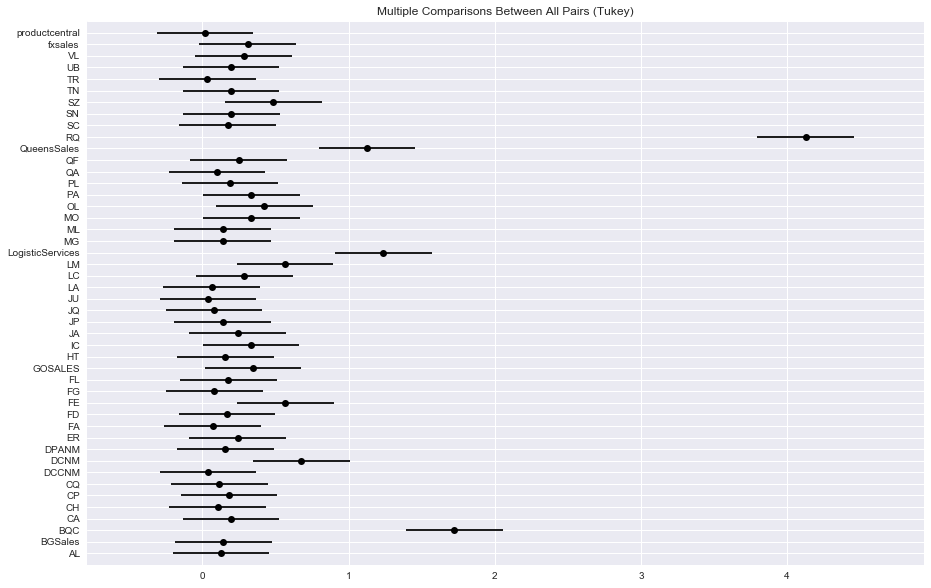

In [95]:
tk.plot_simultaneous(figsize=(15,10));

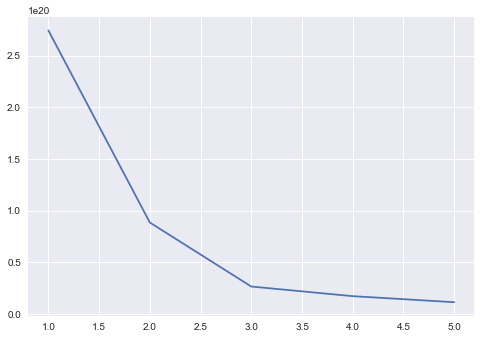

In [94]:
from sklearn.cluster import KMeans

wss=[]
for i in range(1,6):
    clus = KMeans(n_clusters=i,init='k-means++')
    clus.fit(totalizadoDia)
    wss.append(clus.inertia_)

plt.plot(range(1,6),wss);

In [79]:
from sklearn.cluster import KMeans

In [80]:
y_pred = KMeans(n_clusters=3,init='k-means++').fit_predict(totalizadoDia)

In [81]:
totalizadoDia['Grupo'] = y_pred
totalizadoDia.sample(10)

,0,1,2,3,4,5,6,7,8,9,Grupo
WebFlowersMO,8555287.0,2.078284e+08,4.883333e+08,8.551069e+08,314591669.0,33568587.0,5.117218e+08,4.297958e+08,3.781868e+08,3.587770e+08,0
WebFlowersFL,5660832.0,1.361932e+08,2.369884e+08,2.630971e+08,122141541.0,36026661.0,3.603020e+08,3.651689e+08,1.869180e+08,1.940571e+08,0
WebFlowersLM,6089402.0,5.449914e+08,8.130632e+08,7.414686e+08,779915253.0,79074654.0,1.281560e+09,5.696176e+08,6.554161e+08,6.304471e+08,0
WebFlowersGOSALES,319160563.0,5.193451e+08,3.350437e+08,3.847280e+08,71146366.0,18077247.0,7.983077e+08,5.059539e+08,3.984071e+08,4.614359e+08,0
WebFlowersLogisticServices,833619493.0,1.367143e+09,1.889043e+09,1.788736e+09,846742411.0,457777845.0,1.756280e+09,1.311501e+09,1.723117e+09,1.804066e+09,2
webflowersproductcentral,12033666.0,2.102641e+07,1.808150e+07,2.264860e+07,17388776.0,19224185.0,2.244647e+07,1.958865e+07,1.674672e+07,1.302646e+07,0
WebFlowersCP,13149065.0,2.350024e+08,2.358881e+08,2.187884e+08,380472755.0,27889026.0,2.641111e+08,2.359941e+08,1.584499e+08,2.241037e+08,0
WebFlowersLC,47341304.0,4.238679e+08,3.305837e+08,3.885638e+08,304883489.0,63737653.0,6.242681e+08,3.243214e+08,2.648257e+08,2.991838e+08,0
WebFlowersER,29009817.0,3.312965e+08,3.523417e+08,6.458908e+08,146079167.0,74502129.0,2.285233e+08,2.833592e+08,2.512992e+08,2.775195e+08,0
WebFlowersCQ,23821945.0,1.829001e+08,1.521588e+08,1.071945e+08,111841503.0,21993149.0,3.023192e+08,1.284177e+08,9.947122e+07,1.287217e+08,0


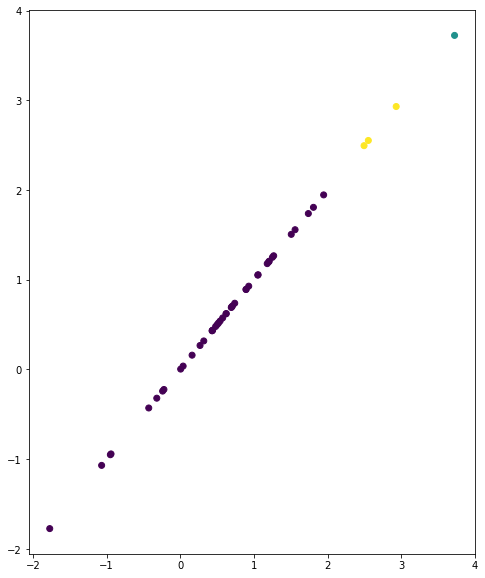

In [84]:
s=totalizadoDia.apply(np.sum,axis=1)/math.pow(1024,3)
s=np.log(s)
plt.figure(figsize=(8,10))
plt.scatter(s,s,c=y_pred);

In [85]:
len(totalizadoDia[totalizadoDia.Grupo==2])

3

In [88]:
palette = plt.cm.get_cmap("viridis", 3)
c = palette(np.arange(0,1,1/46))

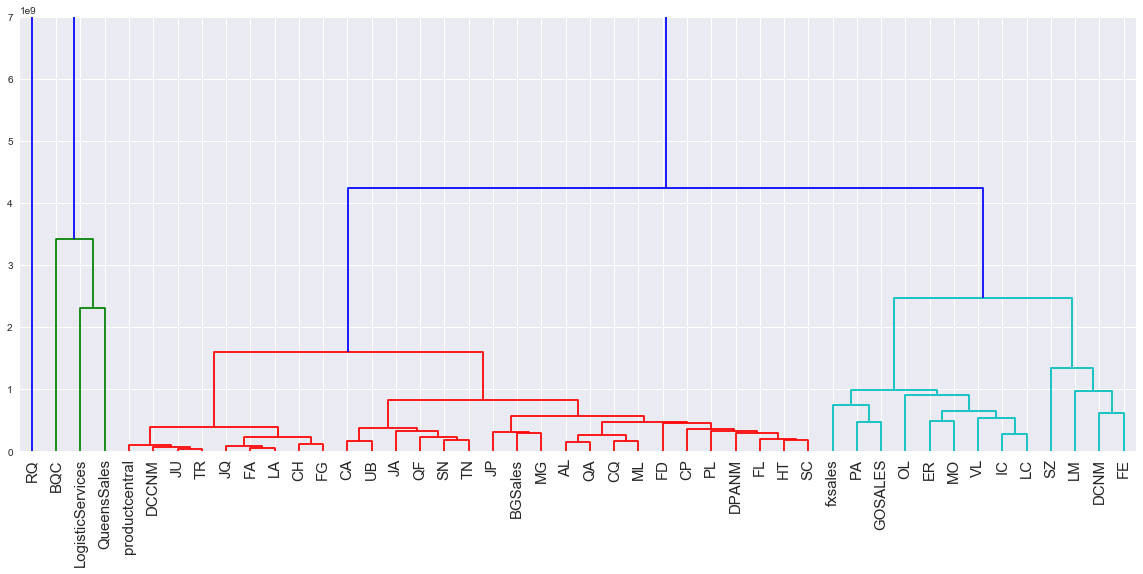

In [93]:
import scipy.cluster.hierarchy as shc
import matplotlib as mpl
mpl.style.use('seaborn')
T=totalizadoDia.copy()
cat=np.array(pd.DataFrame(T.index)[0].apply(lambda c: c[10:]))
T.index=cat
Z = shc.linkage(T,'ward')
plt.figure(figsize=(20,8))
shc.dendrogram(Z, labels=T.index, leaf_rotation=90, orientation="top", color_threshold=0.4e10, above_threshold_color='blue',leaf_font_size=15);
palette = plt.cm.get_cmap("viridis", 3)
T['Grupo']=pd.Categorical(T['Grupo'])
colors=T['Grupo'].cat.codes
ax = plt.gca()
plt.ylim(0,0.7e10)
plt.yscale('linear')
xlbls = ax.get_xmajorticklabels()
num=-1
for lbl in xlbls:
    num+=1
    val=colors[num]
    lbl.size='xx-large'
    #lbl.set_color(palette(val))

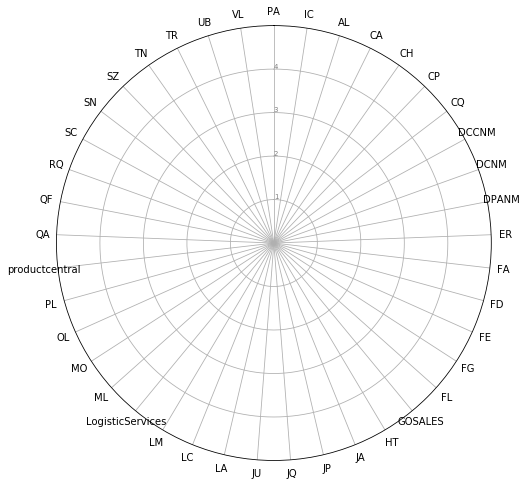

In [228]:
cat=np.array(pd.DataFrame(totalizadoDia.index)[0].apply(lambda c: c[10:]))
N = len(cat)
angles = [n/float(N)*2* math.pi for n in range(N)]
angles+=angles[:1]
plt.figure(figsize=(8,8))
ax=plt.subplot(111,polar=True)
ax.set_theta_offset(math.pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],cat);
ax.set_rlabel_position(0)
plt.yticks([1,2,3,4], ["1","2","3","4"], color="grey", size=7)
plt.ylim(0,5);